In [12]:
print(__doc__)
%matplotlib inline

Automatically created module for IPython interactive environment


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

In [7]:
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples,n_features=100,100
X=np.random.randn(n_samples,n_features)
# Create weights with a precision lambda_ of 4
lambda_ = 4
w=np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
relevant_features

array([12, 16, 20, 33, 75, 28, 89, 19, 92, 42])

In [9]:
for i in relevant_features:
    w[i]=stats.norm.rvs(loc=0,scale=1./np.sqrt(lambda_))
# Create noise with a precision alpha of 50
alpha_=50.
noise=stats.norm.rvs(loc=0,scale=1./np.sqrt(alpha_),size=n_samples)
# Create the target
y=np.dot(X,w)+noise

In [10]:
clf=BayesianRidge(compute_score=True)
clf.fit(X,y)

ols=LinearRegression()
ols.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

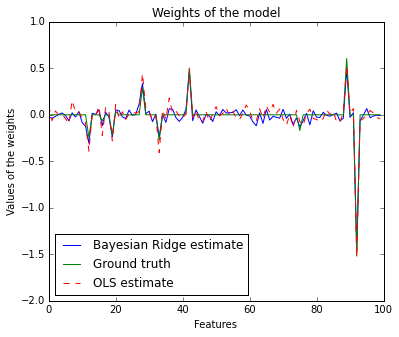

In [13]:
plt.figure(figsize=(6,5))
plt.title("Weights of the model")
plt.plot(clf.coef_,'b-',label="Bayesian Ridge estimate")
plt.plot(w,'g-',label="Ground truth")
plt.plot(ols.coef_,'r--',label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best",prop=dict(size=12))

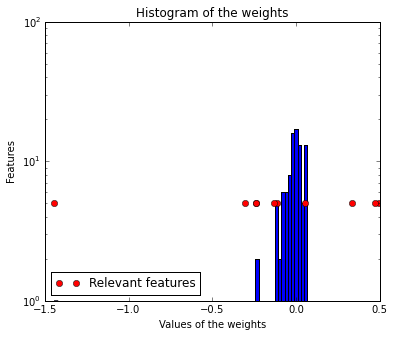

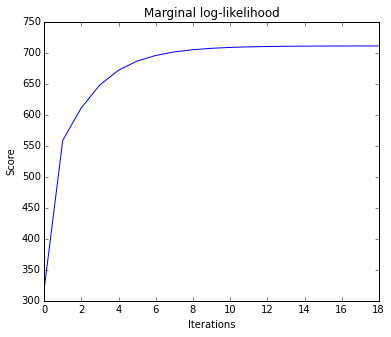

In [14]:
plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, log=True)
plt.plot(clf.coef_[relevant_features], 5 * np.ones(len(relevant_features)),
         'ro', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="lower left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_)
plt.ylabel("Score")
plt.xlabel("Iterations")
plt.show()